# House Project.


Objective

The goal of this project is to demonstrate the application of machine learning (ML) models to predict key variables from a given dataset. The assessment will involve a comprehensive walkthrough of the methodology, including data preparation, model selection, training, and evaluation, using Python. The aim is to effectively leverage ML techniques to solve a prediction problem and to highlight the insights gained throughout the analysis.

Dataset Description

The dataset comprises various features related to properties. Below is a brief explanation of each column:

* Type: The type of property (e.g., apartment, house, villa).

* Price: The price of the property.

* Bedrooms: The number of bedrooms in the property.

* Bathrooms: The number of bathrooms in the property.

* Area: The size of the property, measured in square meters or square feet.

* Furnished: Indicates whether the property is furnished.

* Level: The floor level of the property (e.g., ground floor, first floor).

* Compound: The name or identifier of the compound or community where the property is located.

* Payment_Option: The available payment options (e.g., cash, mortgage, installment).

* Delivery_Date: The expected or actual delivery date of the property.

* Delivery_Term: The terms of delivery (e.g., immediate, under construction).

* City: The city where the property is located.

This structured approach will be followed to build, evaluate, and interpret ML models, showcasing the application of various ML techniques in predicting the target variable(s).








# Import Libraries

* Begin by importing the essential libraries for data manipulation and visualization. Subsequently, import scikit-learn along with the relevant tools for model selection and evaluation metrics to assess the performance of the machine learning models.



In [2]:
# Libraries needed for the study
import pandas as pd
import numpy as np

# Visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno



# Import the Dataset into a Pandas DataFrame.

* Load the Inca Tribe House Prices.csv file into a DataFrame named df_housing using pandas. Display the first five rows to review the data and ensure that it has been imported correctly.


In [3]:
# Importing the data into a pandas dataframe
df_housing = pd.read_csv("Inca Tribe House Prices.csv")
df_housing.head()


,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Chalet,70000,2.0,2.0,10.0,Yes,Unknown,Fanar De Luna,Cash,Ready to move,Finished,Ain Sukhna
1,Apartment,1500000,3.0,3.0,10.0,No,4,Unknown,Unknown Payment,Ready to move,Unknown,New Hut - El Tagamoa
2,Stand Alone Villa,29000000,5.0,6.0,11.0,No,Unknown,Mivida,Cash,Ready to move,Core & Shell,New Hut - El Tagamoa
3,Chalet,3000000,2.0,2.0,12.0,No,Ground,Marina 5,Cash,Ready to move,Finished,North Coast
4,Apartment,1128000,3.0,2.0,14.0,No,3,Beit Al Watan,Installment,soon,Unknown,New Hut - El Tagamoa


# Explore the Dataset

* Utilize the info() and describe() methods to gain a detailed understanding of the dataset. The info() method will provide insights into the structure of the DataFrame and highlight any missing values, while the describe() method will deliver summary statistics for the numerical features.


In [4]:
# Using the info method
df_housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27322 entries, 0 to 27321
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            27322 non-null  object 
 1   Price           27322 non-null  int64  
 2   Bedrooms        27119 non-null  float64
 3   Bathrooms       27151 non-null  float64
 4   Area            26851 non-null  float64
 5   Furnished       27322 non-null  object 
 6   Level           27322 non-null  object 
 7   Compound        27322 non-null  object 
 8   Payment_Option  27322 non-null  object 
 9   Delivery_Date   27322 non-null  object 
 10  Delivery_Term   27322 non-null  object 
 11  City            27322 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.5+ MB


In [5]:
# The describe method will retrieve the statical properties of the numerical columns
df_housing.describe()


,Price,Bedrooms,Bathrooms,Area
count,2.732200e+04,27119.000000,27151.000000,26851.000000
mean,4.761822e+06,3.242044,2.811388,229.305711
std,6.766653e+06,1.212341,1.354498,161.047915
min,3.000000e+04,1.000000,1.000000,10.000000
25%,1.150000e+06,3.000000,2.000000,125.000000
50%,2.731000e+06,3.000000,3.000000,175.000000
75%,5.989000e+06,4.000000,3.000000,275.000000
max,2.400000e+08,10.000000,10.000000,998.000000


# Exploratory Data Analysis
* In this section, I will use the Seaborn and Matplotlib libraries to analyze the dataset's distributions and identify patterns and trends within the data.
.

# Utilizing Seaborn Pairplot for Analysis.

* Given the limited number of features in the dataset, I will use the Seaborn pairplot to explore the distributions and interrelationships among the features.


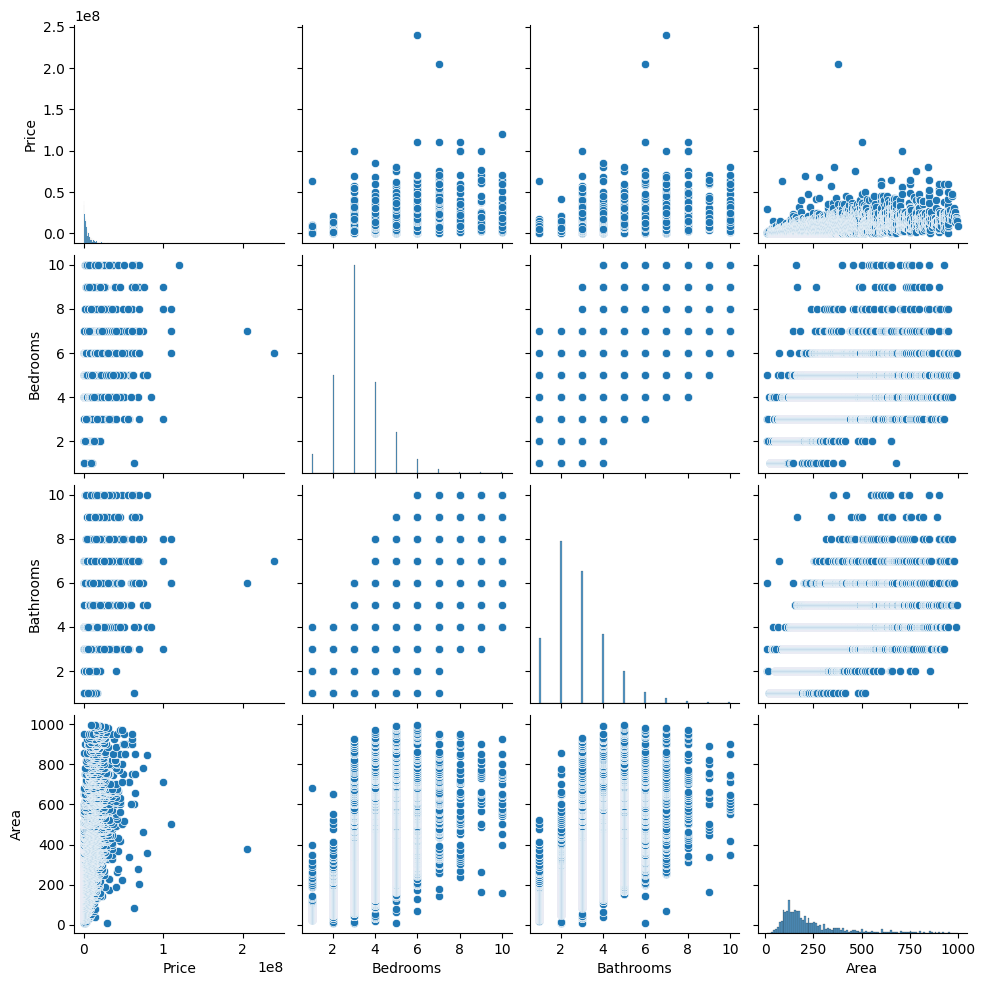

In [6]:
# Use the seaborn pairplot to check the distribution of the datapoint.
sns.pairplot(df_housing)


* The pairplot above illustrates the relationships and distributions of the features within the dataset. It reveals a strong correlation between Area, Bathroom, Bedroom, and Price. Additionally, there appears to be a linear relationship between the Bathroom and Bedroom features. These observations prompt a deeper exploration of the correlation between these features.

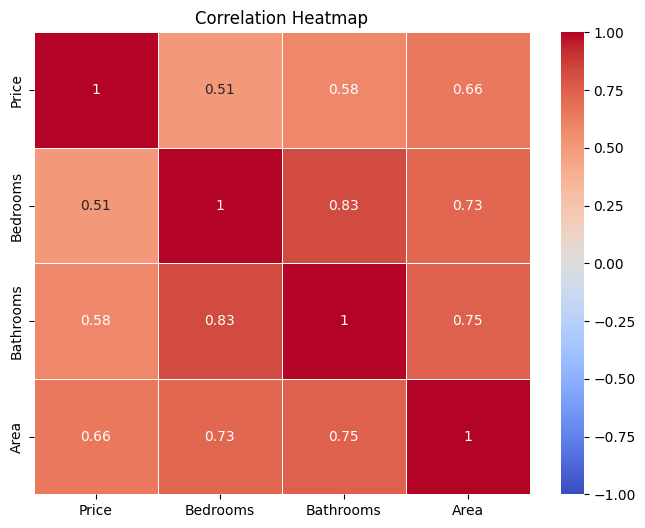

In [8]:
# Check for corolation between variables in the dataset
corrolation = df_housing.corr()

# Ploting the corrolation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corrolation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap reinforces the observations made in the pairplot, highlighting that these four features Area, Bathroom, Bedroom, and Price exhibit a strong positive correlation with each other. This means that as one feature increases, the others tend to increase as well. For example, a high positive correlation between Area and Price indicates that larger properties typically have higher prices.

Understanding high correlation between features is crucial for several reasons:

* Redundancy: Highly correlated features may carry redundant information, which can be reduced through feature selection or dimensionality reduction techniques like Principal Component Analysis (PCA).

* Multicollinearity: In regression models, high correlation between independent variables can lead to multicollinearity, causing instability in model coefficients and complicating the interpretation of each feature's impact.

* Model Performance: Recognizing correlations can enhance model performance by informing feature engineering decisions, such as combining or removing highly correlated features to prevent overfitting.

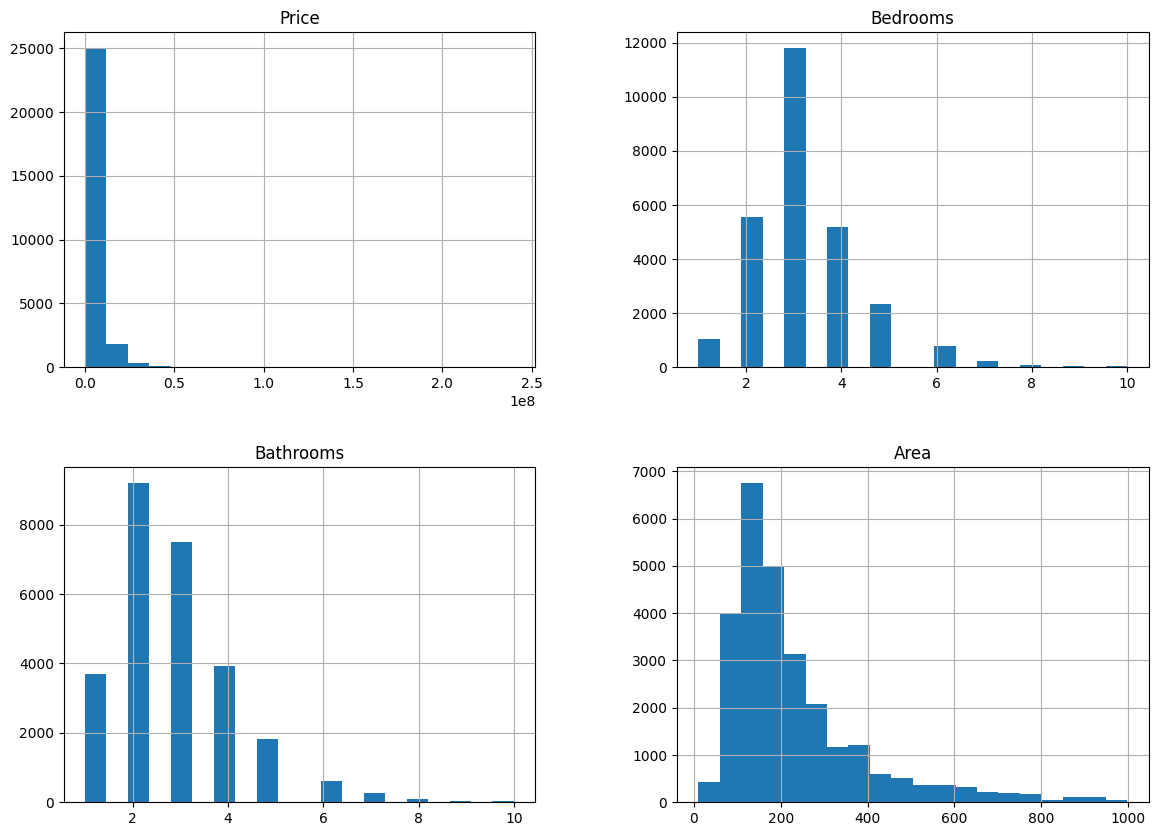

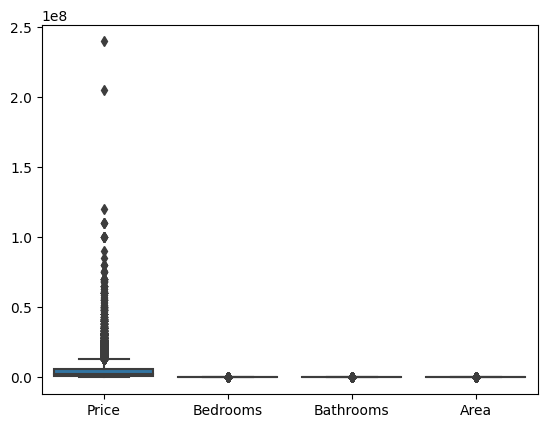

In [9]:
# Exploring the distributions within the dataset 
df_housing.hist(bins=20, figsize=(14, 10))
plt.show()

sns.boxplot(data=df_housing)
plt.show()

The histogram and boxplot above illustrate the distributions of the Price, Bedrooms, Bathrooms, and Area features. Notably, the boxplot reveals the presence of outliers in the Price feature, indicating a broad range of property prices, with some properties priced significantly higher than the majority.

In contrast, the Bedrooms, Bathrooms, and Area features exhibit more uniform distributions with fewer outliers, suggesting that most properties share similar characteristics in terms of the number of bedrooms, bathrooms, and overall area.

This analysis indicates that while the Price feature displays substantial variability, likely influenced by a few exceptionally high-priced properties, the other features are relatively consistent across the dataset.

# Handling Missing Values and Inconsistencies in the Dataset.

The info() method reveals that several columns, specifically Bathroom, Bedroom, and Area, contain missing values. Further exploration has identified inconsistencies within the dataset, such as certain features with values labeled as "unknown" or "unknown payments."

In this section, we will address these missing values and inconsistencies, provide a rationale for why certain features may be dropped, and explain how we handle the "unknown" values to ensure the integrity and reliability of the dataset.

In [10]:
# Check for missing values
df_housing.isnull().sum()

Type                0
Price               0
Bedrooms          203
Bathrooms         171
Area              471
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

<AxesSubplot:>

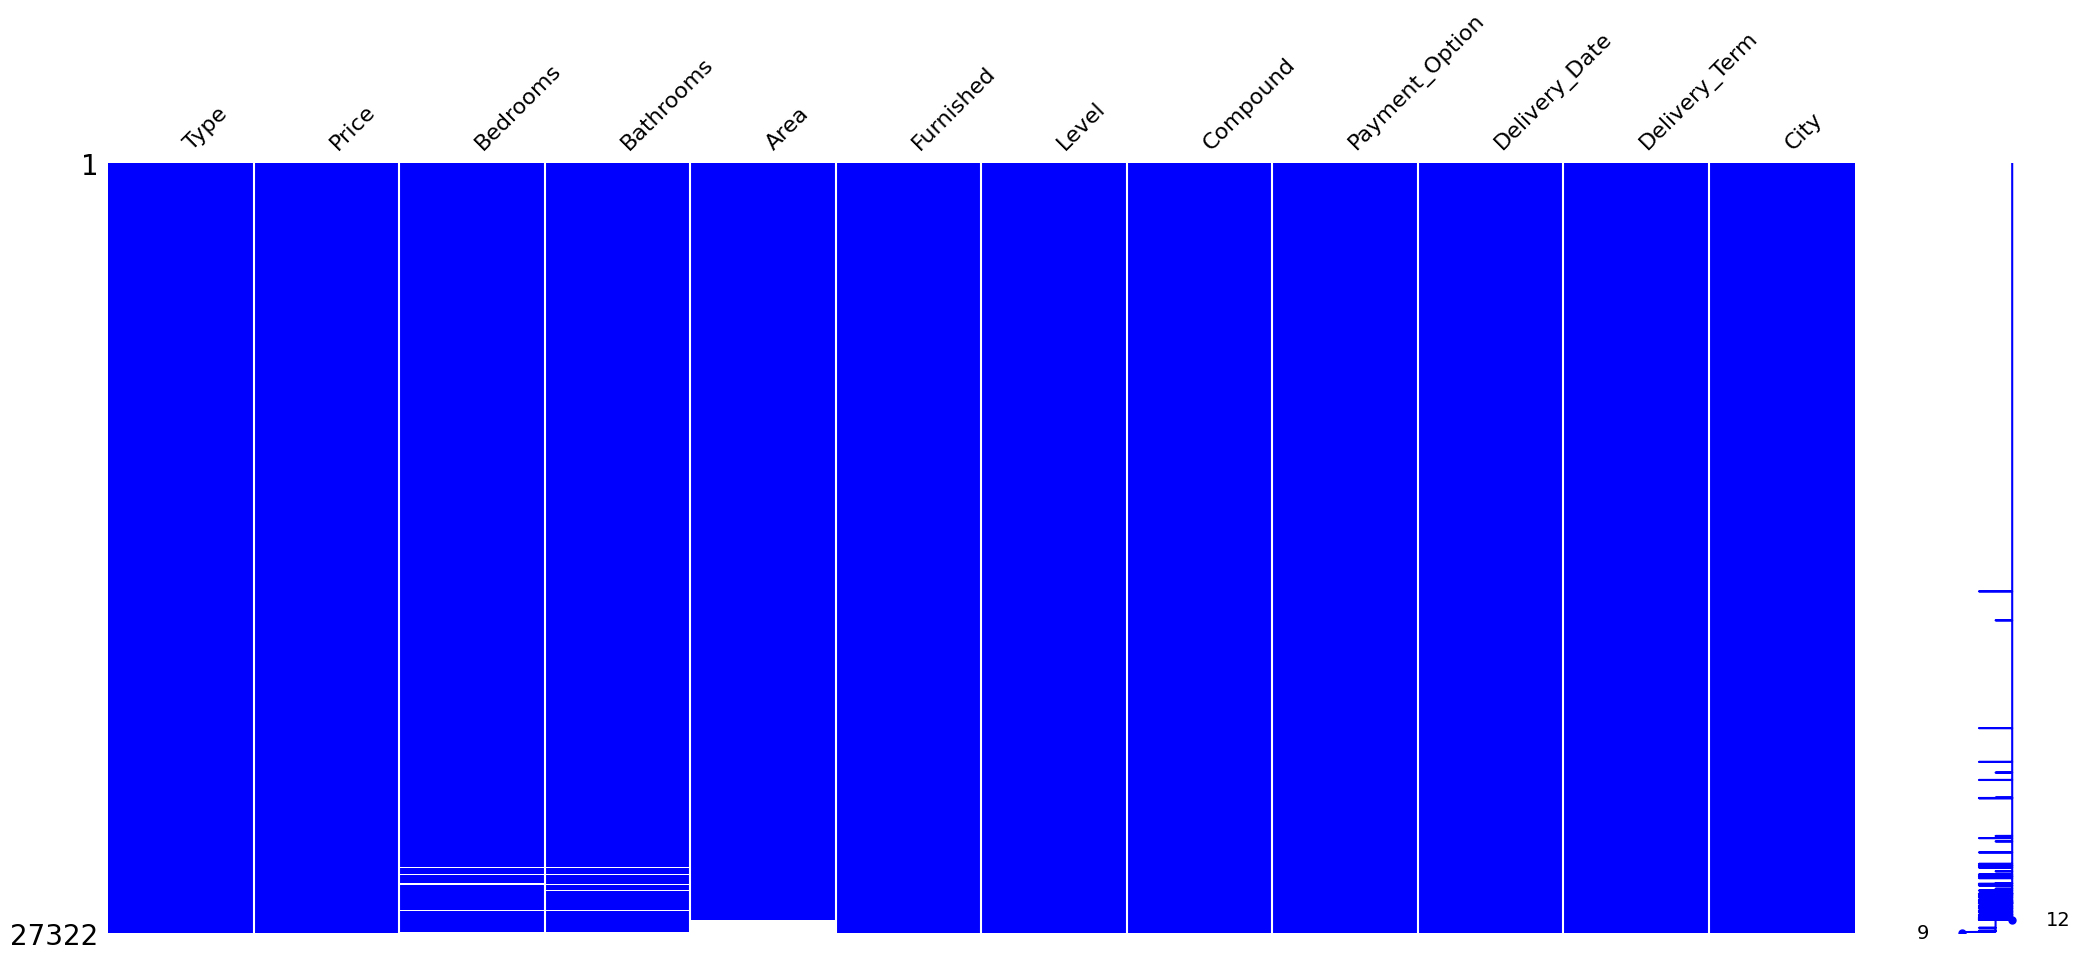

In [11]:
# Depicting missing/nan values within the dataframe
msno.matrix(df_housing,color=(0,0,1))

* Showing the first five rows and the last five rows to help identifying the columns with the unknown values

In [13]:
# An overview of the columns with the unknown values in them
df_housing.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Chalet,70000,2.0,2.0,10.0,Yes,Unknown,Fanar De Luna,Cash,Ready to move,Finished,Ain Sukhna
1,Apartment,1500000,3.0,3.0,10.0,No,4,Unknown,Unknown Payment,Ready to move,Unknown,New Hut - El Tagamoa
2,Stand Alone Villa,29000000,5.0,6.0,11.0,No,Unknown,Mivida,Cash,Ready to move,Core & Shell,New Hut - El Tagamoa
3,Chalet,3000000,2.0,2.0,12.0,No,Ground,Marina 5,Cash,Ready to move,Finished,North Coast
4,Apartment,1128000,3.0,2.0,14.0,No,3,Beit Al Watan,Installment,soon,Unknown,New Hut - El Tagamoa


In [14]:
# An overview of the lst five rows to gain a better understanding
df_housing.tail()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
27317,Stand Alone Villa,65000000,NaN,NaN,NaN,No,Unknown,Katameya Dunes,Cash,Ready to move,Semi Finished,New Hut - El Tagamoa
27318,Stand Alone Villa,65000000,NaN,NaN,NaN,No,Unknown,Unknown,Cash,Ready to move,Finished,New Hut - El Tagamoa
27319,Stand Alone Villa,69000000,NaN,NaN,NaN,No,Unknown,Hyde Park New Cairo,Cash or Installment,soon,Not Finished,New Hut - El Tagamoa
27320,Stand Alone Villa,90000000,NaN,NaN,NaN,No,Unknown,Katameya Dunes,Cash,Ready to move,Semi Finished,(View phone number)
27321,Stand Alone Villa,100000000,NaN,NaN,NaN,Yes,Unknown,Unknown,Cash,Ready to move,Unknown,New Hut - El Tagamoa


* Below, I am converting all "unknown" values to NaN. Since these "unknown" values are represented differently across various columns, I need to handle each column individually. For example, the Payment_Option column contains "Unknown payment," while the Compound column has "Unknown." If these values were consistent across all columns, I could have used a loop to iterate through the columns and replace the "unknown" values, thereby improving the efficiency of the code.

In [15]:
# Converting the Unknown values throught the dataset
df_housing = df_housing.replace('Unknown', np.nan)

In [16]:
# Converting the Unknown value in the Payment Option Column
df_housing['Payment_Option'] = df_housing['Payment_Option'].replace('Unknown Payment', np.nan)

In [17]:
# Converting the Unknown value in the level column
df_housing['Level'] = df_housing['Level'].replace('Unknown', np.nan)

In [18]:
# Converting the unknown value in the delivery term
df_housing['Delivery_Term'] = df_housing['Delivery_Term'].replace('Unknown ', np.nan)

In [20]:
# Check if all the unknow values have been converted to nan
df_housing.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Chalet,70000,2.0,2.0,10.0,Yes,NaN,Fanar De Luna,Cash,Ready to move,Finished,Ain Sukhna
1,Apartment,1500000,3.0,3.0,10.0,No,4,NaN,NaN,Ready to move,NaN,New Hut - El Tagamoa
2,Stand Alone Villa,29000000,5.0,6.0,11.0,No,NaN,Mivida,Cash,Ready to move,Core & Shell,New Hut - El Tagamoa
3,Chalet,3000000,2.0,2.0,12.0,No,Ground,Marina 5,Cash,Ready to move,Finished,North Coast
4,Apartment,1128000,3.0,2.0,14.0,No,3,Beit Al Watan,Installment,soon,NaN,New Hut - El Tagamoa


In [21]:
# Calculating the missing percentages per column
missing_percentage = df_housing.isnull().sum() / len(df_housing) * 100
missing_percentage

Type               0.000000
Price              0.000000
Bedrooms           0.742991
Bathrooms          0.625869
Area               1.723886
Furnished         31.077520
Level             38.064563
Compound          40.377718
Payment_Option    11.024083
Delivery_Date     36.864066
Delivery_Term     17.092453
City               0.000000
dtype: float64

* Based on the above calculations, columns such as Furnished, Level, Compound, and Delivery_Date have more than 30% missing values. This is a substantial amount of missing data, making it difficult to attribute without compromising the integrity of the analysis. As a result, these columns may be dropped. Additionally, certain features can serve as proxies for others; for example, the Delivery_Term column can be used as a proxy for the Furnished column, as they convey similar information.


* Features with less than 30% missing data are retained because they provide valuable information while maintaining a manageable level of incompleteness. Imputing these features using the mode is preferred as it helps preserve the overall distribution of the data and is less affected by outliers, which can distort mean-based imputations. This approach ensures that the imputed values are representative of the most frequent occurrences, thereby maintaining the integrity of the analysis.

In [22]:
# Dropping all the columns that have more than 30 percent of missing values
columns_to_drop = missing_percentage[missing_percentage > 30].index
df_cleaned = df_housing.drop(columns=columns_to_drop)

In [23]:
# Checking the cleaned up dataframe
df_cleaned.head()

,Type,Price,Bedrooms,Bathrooms,Area,Payment_Option,Delivery_Term,City
0,Chalet,70000,2.0,2.0,10.0,Cash,Finished,Ain Sukhna
1,Apartment,1500000,3.0,3.0,10.0,NaN,NaN,New Hut - El Tagamoa
2,Stand Alone Villa,29000000,5.0,6.0,11.0,Cash,Core & Shell,New Hut - El Tagamoa
3,Chalet,3000000,2.0,2.0,12.0,Cash,Finished,North Coast
4,Apartment,1128000,3.0,2.0,14.0,Installment,NaN,New Hut - El Tagamoa


* The remaining features with less than 30% missing values—namely Bedroom, Bathroom, Area, Delivery Term, and Payment Option—will be imputed using the mode. The mode, being the most frequently occurring value, is chosen for its robustness against outliers, thereby minimizing the risk of skewing the analysis. This method ensures that the imputed values accurately reflect the prevalent characteristics of the data.

In [28]:
# Imputting the missing values in the delivery term column with mode
mode_value = df_cleaned['Delivery_Term'].mode()[0]
df_cleaned['Delivery_Term'].fillna(mode_value, inplace=True)

In [29]:
# Imputting the missing values in the payment option column with mode
mode_value = df_cleaned['Payment_Option'].mode()[0]
df_cleaned['Payment_Option'].fillna(mode_value, inplace=True)

In [30]:
# Imputting the missing values in the Bedroom column with mode
mode_value = df_cleaned['Bedrooms'].mode()[0]
df_cleaned['Bedrooms'].fillna(mode_value, inplace= True)

In [31]:
# Imputting the missing values in the Bathroom column with mode
mode_value = df_cleaned['Bathrooms'].mode()[0]
df_cleaned['Bathrooms'].fillna(mode_value, inplace = True)

In [32]:
# Imputting the missing values in the Area column with mode
mode_value = df_cleaned['Area'].mode()[0]
df_cleaned['Area'].fillna(mode_value, inplace = True)

In [34]:
# Check if the missing values are imputted correcly
df_cleaned.head()

,Type,Price,Bedrooms,Bathrooms,Area,Payment_Option,Delivery_Term,City
0,Chalet,70000,2.0,2.0,10.0,Cash,Finished,Ain Sukhna
1,Apartment,1500000,3.0,3.0,10.0,Cash or Installment,Finished,New Hut - El Tagamoa
2,Stand Alone Villa,29000000,5.0,6.0,11.0,Cash,Core & Shell,New Hut - El Tagamoa
3,Chalet,3000000,2.0,2.0,12.0,Cash,Finished,North Coast
4,Apartment,1128000,3.0,2.0,14.0,Installment,Finished,New Hut - El Tagamoa


# Data Preprocessing

* In this section, the data will undergo preprocessing to prepare it for machine learning models, as categorical data cannot be directly input into these models. The preprocessing method selected will depend on the type of categorical data present—whether ordinal or nominal—and the specific model being used. The choice between one-hot encoding, label encoding, or ordinal encoding will be determined based on these factors. Given the nature of the categorical data in this dataset, label encoding is the most suitable option.

In [35]:
# Importing the label encoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Initiating and Encoder instance
label_encoder = LabelEncoder()


In [36]:
# Encoding all the columns with catergorical data
df_cleaned['Type'] = label_encoder.fit_transform(df_cleaned['Type'])
df_cleaned['Payment_Option'] = label_encoder.fit_transform(df_cleaned['Payment_Option'])
df_cleaned['Delivery_Term'] = label_encoder.fit_transform(df_cleaned['Delivery_Term'])
df_cleaned['City'] = label_encoder.fit_transform(df_cleaned['City'])


In [37]:
# Check if all the catergorical features have encoded correctly.
df_cleaned.tail()

,Type,Price,Bedrooms,Bathrooms,Area,Payment_Option,Delivery_Term,City
27317,4,65000000,3.0,2.0,120.0,0,3,121
27318,4,65000000,3.0,2.0,120.0,0,1,121
27319,4,69000000,3.0,2.0,120.0,1,2,121
27320,4,90000000,3.0,2.0,120.0,0,3,0
27321,4,100000000,3.0,2.0,120.0,0,1,121


# Model Selection

* The dataset is labeled, a supervised learning algorithm is appropriate for this task. Given that the goal is to predict the price of a house, a regression model is the natural choice. To achieve a well-fitting model, three different models were selected: Linear Regression, Decision Tree, and Random Forest.

* Linear Regression: was chosen for its simplicity and interpretability. It is particularly effective when the relationship between the features and the target variable is linear. However, it may struggle with capturing complex patterns in the data, especially when interactions between variables are important.


* Decision Tree: was selected for its ability to model non-linear relationships and handle both numerical and categorical features without the need for extensive preprocessing. It is intuitive and easy to visualize, but it can be prone to overfitting, particularly when the tree is deep.


* Random Forest was included as it combines the strengths of multiple decision trees to improve accuracy and generalization. By averaging the predictions of many trees, Random Forest reduces overfitting and provides robust performance. However, it can be computationally intensive and less interpretable than simpler models.


* In this dataset, four out of the eight features—Price, Area, Bathroom, and Bedroom—show a correlation of at least 0.51, indicating a strong relationship with the target variable (Price). The other features—City, Type, Payment Option, and Delivery Term—are included to capture additional aspects of the housing data that might influence the price, despite having a lower correlation with the target. The selection of these models allows for a balanced exploration of both simple and complex patterns in the data.

# Model Implemation

To outline the process for predicting house prices using the defined features and models, you would proceed with the following steps:

1. Define X and y
X: The input features used to predict the target variable. In this case, the features include Area, Bathroom, Bedroom, City, Type, Payment Option, and Delivery Term.
y: The target variable, which is the Price of the house.


2. Import Required Libraries
Train-Test Split: To divide the data into training and testing sets.
Model Selection: To choose and implement the regression models.
Evaluation Metrics: To assess the performance of the models using metrics like RMSE (Root Mean Squared Error) and cross-validation.


3. Split the Data
Use train_test_split to split the data into training and testing sets. Typically, 80% of the data is used for training, and 20% is reserved for testing.


4. Model Training and Evaluation
Train the Models: Fit the three selected models—Linear Regression, Decision Tree, and Random Forest—on the training data.
Evaluate the Models: Use RMSE as the primary metric to evaluate model performance on the test set. Additionally, perform cross-validation to assess the model's generalizability.


5. Cross-Validation
Perform cross-validation to ensure the robustness of the model.

# Linear Regression model

In [38]:
# Obtaining the columns of the cleaned data
df_cleaned.columns

Index(['Type', 'Price', 'Bedrooms', 'Bathrooms', 'Area', 'Payment_Option',
       'Delivery_Term', 'City'],
      dtype='object')

In [39]:
# Define the dependent and inependent variables

X = df_cleaned[['Type', 'Bedrooms', 'Bathrooms', 'Area', 'Payment_Option',
       'Delivery_Term', 'City']]

y = df_cleaned['Price']

In [45]:
# Importing the train test split from sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Initiating the linear regression model
linear_model = LinearRegression()
# Fitting the model
linear_model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Predictions using he models
predictions = linear_model.predict(X_test)
predictions

array([4325793.2035241 ,  371019.15890189, 3319714.66878044, ...,
       5301373.79813451, 3479064.1655095 , 8547120.48896138])

In [49]:
# Evaluating the linear model using RMSE
np.sqrt(metrics.mean_squared_error(y_test, predictions))

5515033.567102981

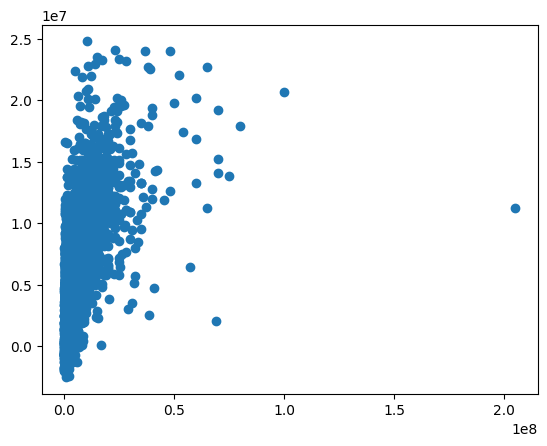

In [50]:
plt.scatter(y_test,predictions)

# Decision tree model

In [52]:
# Importing all the neccessary libraries and model needed for decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [53]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# Create the model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [55]:
# Predictions
Decision_predictions = model.predict(X_test)
Decision_predictions


array([  770000.,  3200000.,  1500000., ...,  5155500.,  3367000.,
       17500000.])

In [57]:
np.sqrt(metrics.mean_squared_error(y_test, Decision_predictions))


6486158.53534739

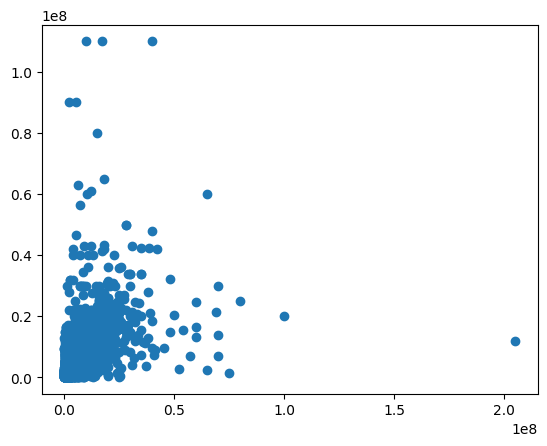

In [56]:
plt.scatter(y_test,Decision_predictions)

# RandomForest model

In [58]:
# Importing the metrics and neccessary libraries needed for random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
# Test training split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Create the model
model = RandomForestRegressor(n_estimators=100)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor()

In [61]:
# Random forest predictions
Forest_predictions = model.predict(X_test)
Forest_predictions

array([ 1777801.83333333,  1716210.625     ,  2265237.33333333, ...,
        4134588.33333333,  2980890.95238095, 18568880.        ])

In [62]:
# Evaluating the Random forest using RMSE
np.sqrt(metrics.mean_squared_error(y_test, Forest_predictions))

5105869.963330258

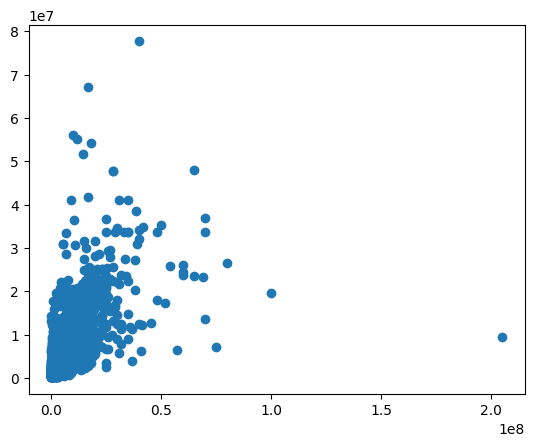

In [63]:
plt.scatter(y_test, Forest_predictions)


The RMSE (Root Mean Squared Error) results you've received for your models are as follows:

Linear Regression RMSE: 5,515,033.57
Decision Tree RMSE: 6,486,158.54
Random Forest RMSE: 5,105,869.96


* RMSE Interpretation:
* RMSE measures the average magnitude of the errors between the predicted and actual values. A lower RMSE indicates better model performance, meaning the model’s predictions are closer to the actual values.

* The RMSE values are in the same units as the target variable (house prices), which in this case are likely in currency units (e.g., Rand).

* Comparison of Models:
* Random Forest has the lowest RMSE at 5,105,869.96, suggesting it has the best performance among the three models in terms of prediction accuracy. This means the Random Forest model's predictions are, on average, closer to the actual house prices compared to the other models.

* Linear Regression has an RMSE of 5,515,033.57, which is higher than that of the Random Forest but lower than the Decision Tree. This indicates that Linear Regression also performs well but not as accurately as the Random Forest.

* Decision Tree has the highest RMSE at 6,486,158.54, indicating that its predictions are, on average, the furthest from the actual values. This suggests that the Decision Tree model may have overfitted the training data or may not have captured the relationships in the data as effectively as the other models.


* Model Performance:
* Random Forest is the most accurate model in this case, as evidenced by its lowest RMSE. It effectively captures complex relationships in the data by combining multiple decision trees.


* Linear Regression provides a decent performance but does not handle non-linear relationships as effectively as Random Forest.
* Decision Tree shows the least favorable performance, possibly due to overfitting or its inability to generalize well to unseen data.


* The Random Forest model is preferable for this dataset as it provides the best balance of prediction accuracy and robustness.
* Linear Regression might be used as a baseline model, but for better performance, more complex models like Random Forest are recommended.
* Decision Tree might need further tuning or pruning to improve its performance. It’s important to consider whether the Decision Tree is overfitting or if there are other factors affecting its performance.


# Cross-Validation

Perform Cross-Validation: Apply k-fold cross-validation to ensure that each model's performance is consistent across different subsets of the data.

# Linear Regression

In [122]:
# Define the dependent and inependent variables

X = df_cleaned[['Type', 'Bedrooms', 'Bathrooms', 'Area', 'Payment_Option',
       'Delivery_Term', 'City']]

y = df_cleaned['Price']

In [123]:
# Importing train test split
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [124]:
# Importing the linear regressin model
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

# Defining the K-fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Model
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [125]:
# predictions
predictions = linear_model.predict(X_test)

# Cross-validation
rmse_list = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    linear_model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_list.append(rmse)

In [126]:
average_rmse = np.mean(rmse_list)
print(f'Average RMSE: {average_rmse}')

Average RMSE: 2745779.3944189


# Decision Tree

In [127]:
# Importing all the neccessary libraries and model needed for decision tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [128]:
# Test training split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
# Create the model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [130]:
# Predictions
Decision_predictions = model.predict(X_test)
Decision_predictions


array([  770000.,  1225000.,  1500000., ...,  5155500.,  3367000.,
       21000000.])

In [131]:
rmse_list = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_list.append(rmse)

In [132]:
average_rmse = np.mean(rmse_list)
print(f'Average RMSE for Decision Tree: {average_rmse}')

Average RMSE for Decision Tree: 5935896.607348936


# Random forest

In [133]:
# Importing the metrics and neccessary libraries needed for random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [134]:
# Define the dependent and inependent variables

X = df_cleaned[['Type', 'Bedrooms', 'Bathrooms', 'Area', 'Payment_Option',
       'Delivery_Term', 'City']]

y = df_cleaned['Price']

In [135]:
# Test training split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
# Create the model
forest_model = RandomForestRegressor(n_estimators=100)

# Train the model
forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [137]:
# Random forest predictions
predictions = forest_model.predict(X_test)
predictions

array([ 1976562.16666667,  2032582.5       ,  2293499.33333333, ...,
        4317692.02380952,  3042332.14238095, 17427880.        ])

In [138]:
# Perfoming cross validation for the random forest model
rmse_list = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    forest_model.fit(X_train, y_train)
    
    # Predict and evaluate
    predictions = forest_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,predictions))
    rmse_list.append(rmse)

In [139]:
# printing out the cross vaidation results
average_rmse = np.mean(rmse_list)
print(f'Average RMSE for Random Forest: {average_rmse}')

Average RMSE for Random Forest: 4583810.785449529


* After conducting cross-validation, it was observed that the results for all three models varied. However, the Linear Regression model exhibited significant fluctuations with each run, while the Decision Tree and Random Forest models produced consistent results. This inconsistency in Linear Regression can be attributed to factors such as data sensitivity and random initialization.

* The persistent variability in Linear Regression outcomes suggests a higher sensitivity to data splits and random factors during training. On the other hand, Decision Tree and Random Forest models showcase superior stability and consistent performance, making them more reliable for predicting house prices. Among these, the Random Forest model stands out, offering the optimal combination of accuracy and robustness.

In [140]:
# Printing the 
importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print feature importances with headers
print("Feature Importances:")
print(feature_importances.to_string(index=False))


Feature Importances:
       Feature  Importance
     Bathrooms    0.348155
          Area    0.296490
          City    0.111354
          Type    0.090973
      Bedrooms    0.074605
Payment_Option    0.040150
 Delivery_Term    0.038274


# Feature Importances Explanation:

The feature importances indicate how much each feature contributes to predicting house prices, as determined by the Random Forest model. Here’s a brief explanation of the importance of each feature:

* Bathrooms (0.348): The most influential feature, showing that the number of bathrooms has the highest impact on house prices. More bathrooms generally increase the value of a property.

* Area (0.296): The size of the property, represented by area, is also highly significant. Larger properties tend to have higher prices.

* City (0.111): The city where the property is located plays a considerable role in determining price, reflecting local market conditions and desirability.
* Type (0.091): The type of property (e.g., house, apartment) affects its value, though to a lesser extent compared to area and bathrooms.

* Bedrooms (0.075): The number of bedrooms is important but less so than bathrooms and area, contributing to the overall value of the property.

* Payment_Option (0.040): The payment option available for the property has a smaller influence on the price.

* Delivery_Term (0.038): The term related to the delivery of the property has the least impact on the house price among the features considered.

# Summary of the study

From the analysis, we’ve learned that the number of bathrooms and the area of the property are the most significant factors influencing house prices, with the city and property type also playing notable roles. The Random Forest model, showing the best balance of accuracy and robustness, highlights the importance of capturing complex relationships in the data. Given the variability in Linear Regression results, it is recommended to rely on Random Forest for more consistent and accurate predictions. Additionally, further investigation into feature interactions and potential data preprocessing could enhance model performance.